In [1]:
#check whether cuda is available, if not you can still use cpu
import torch
print(torch.cuda.is_available())  # Should be True , if your cuda is availabe
print(torch.cuda.device_count())  # Should be > 0 , if your cuda is availabe

False
0


In [2]:
#We use the autogluon library to complete tasks
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
df = pd.read_csv("F:/PCA-kmeans-TFT-time-series-clustering-and-prediction/TFT-Prediction/sample_data/sample_time_varying.csv")    
df.head()

,item_id,timestamp,VV,VH,Rain,NDVI
0,id_582,2019/11/1,0.000000,0.000000,7.103710,-0.046900
1,id_582,2019/11/8,-1.153606,-3.771866,0.000000,-0.017150
2,id_582,2019/11/15,-3.989572,-7.517842,0.531439,0.012600
3,id_582,2019/11/22,-6.892936,-6.990941,1.091206,0.089663
4,id_582,2019/11/29,-6.927140,-6.416092,0.000000,0.185650


In [3]:
static_features_df = pd.read_csv("F:/PCA-kmeans-TFT-time-series-clustering-and-prediction/TFT-Prediction/sample_data/sample_static.csv")
static_features_df.head()

,item_id,VVcluster,VHcluster,dist_fault,dist_river,dist_road,slope,aspect,elevation,collapse_slide,lithology,profile_curv
0,id_582,V_3,H_3,10000,500,10000,25.136938,341.878143,4113,normal,L_8,0.000314
1,id_1742,V_2,H_3,500,100,100,21.064512,179.396912,4005,normal,L_9,-0.009576
2,id_1899,V_2,H_3,2000,500,500,22.556890,198.788620,4320,normal,L_8,-0.005663
3,id_3113,V_2,H_1,2000,500,100,6.451505,165.465546,3995,normal,L_9,-0.002375
4,id_3145,V_3,H_3,2000,500,500,26.497780,194.601273,4370,normal,L_2,0.003561


In [4]:
data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
    static_features_df=static_features_df,
)
data.head()

VV        VH      Rain      NDVI
item_id timestamp                                         
id_582  2019-11-01  0.000000  0.000000  7.103710 -0.046900
        2019-11-08 -1.153606 -3.771866  0.000000 -0.017150
        2019-11-15 -3.989572 -7.517842  0.531439  0.012600
        2019-11-22 -6.892936 -6.990941  1.091206  0.089663
        2019-11-29 -6.927140 -6.416092  0.000000  0.185650

In [5]:
#Define training and testing data
prediction_length = 20 #The length of time steps required for prediction
train_data, test_data = data.train_test_split(prediction_length)

#Create and train a predictor
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    eval_metric="MASE",
    path="output_VV",
    target="VV",
    learner_kwargs={'use_gpu': True}
)
predictor.fit(
    train_data,
    presets="best_quality",   
     excluded_model_types=["Chronos"
                           #SeasonalNaive', 'RecursiveTabular',
                           #"DirectTabular", "CrostonSBA", "NPTS", 
                           #"DynamicOptimizedTheta", "AutoETS", 
                          # "AutoARIMA",  "TemporalFusionTransformer", 
                           #"DeepAR", "PatchTST" 
                         ],    #The annotated models in "best_quality" will be used for training
    time_limit=3600,    #Limit model training time
    refit_full=False,   
    verbosity=4,          
)


Beginning AutoGluon training... Time limit = 3600s
AutoGluon will save models to 'output_VV'
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19044
CPU Count:          8
GPU Count:          0
Memory Avail:       3.06 GB / 7.84 GB (39.0%)
Disk Space Avail:   748.62 GB / 4657.49 GB (16.1%)
Setting presets to: best_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'excluded_model_types': ['Chronos'],
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 2,
 'prediction_length': 20,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'VV',
 'time_limit': 3600,
 'verbosity': 4}

Inferred time series frequency: 'W-FRI'
Provided train_data has 56700 rows, 300 time series. M

[1000]	valid_set's l1: 0.642583


	-0.6413	 = Validation score   (-mean_absolute_error)
	5.59s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 311.19s of the 305.32s of remaining time.
	Ensemble Weights: {'LightGBM': 1.0}
	-0.6413	 = Validation score   (-mean_absolute_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 6.15s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("output_VV\models\DirectTabular\W1\tabular_predictor")
Shortening all series to at most 3374
Shortening all series to at most 3354
Predicting with model DirectTabular\W1
		-3.1677      = Validation score (-MASE)
		6.557   s    = Training runtime
		0.479   s    = Prediction runtime
	-2.9878       = Validation score (-MASE)
	8.52    s     = Training runtime
	0.48    s     = Validation (prediction) runtime
Reserving 385.8s for ensemble
Training timeseries model CrostonSBA

In [6]:
#Autogluon will automatically select the optimal model to predict
predictions = predictor.predict(train_data)
predictions.head()

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble
Found no cached predictions
Prediction order: ['TemporalFusionTransformer', 'PatchTST', 'WeightedEnsemble']
Predicting with model TemporalFusionTransformer\W1
Predicting with model TemporalFusionTransformer
Predicting with model PatchTST\W1
Predicting with model PatchTST
Cached predictions saved to output_VV\models\cached_predictions.pkl


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                      
id_582  2023-06-16  6.689059  4.682204  5.276300  5.919382  6.256794   
        2023-06-23  6.896843  4.479441  5.281665  6.017281  6.414990   
        2023-06-30  6.892863  4.161202  5.133461  5.895908  6.378588   
        2023-07-07  6.537212  3.750644  4.764380  5.516687  6.022485   
        2023-07-14  6.190516  3.498908  4.490668  5.201655  5.702220   

                         0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                     
id_582  2023-06-16  6.689059  6.872206  7.300624  7.830508  8.415354  
        2023-06-23  6.896843  7.184684  7.726026  8.369252  9.133715  
        2023-06-30  6.892863  7.269786  7.877337  8.567533  9.478727  
        2023-07-07  6.537212  6.931549  7.561349  8.282558  9.179810  
        2023-07-14  6.190516  6.582478  7.202447  7.914050  8.771211

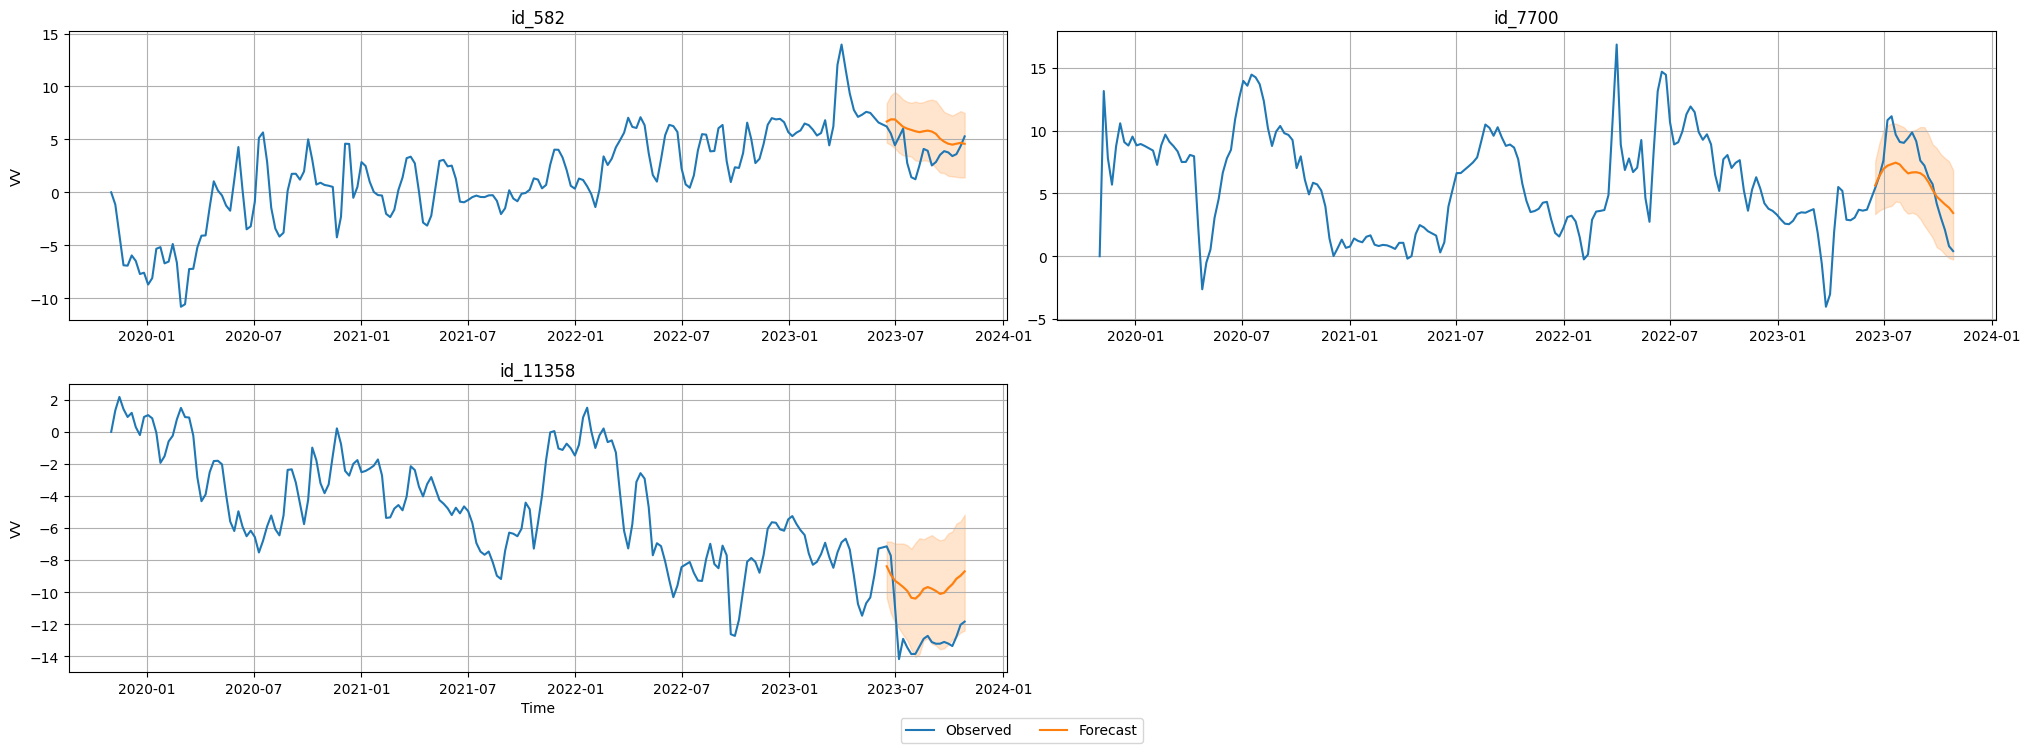

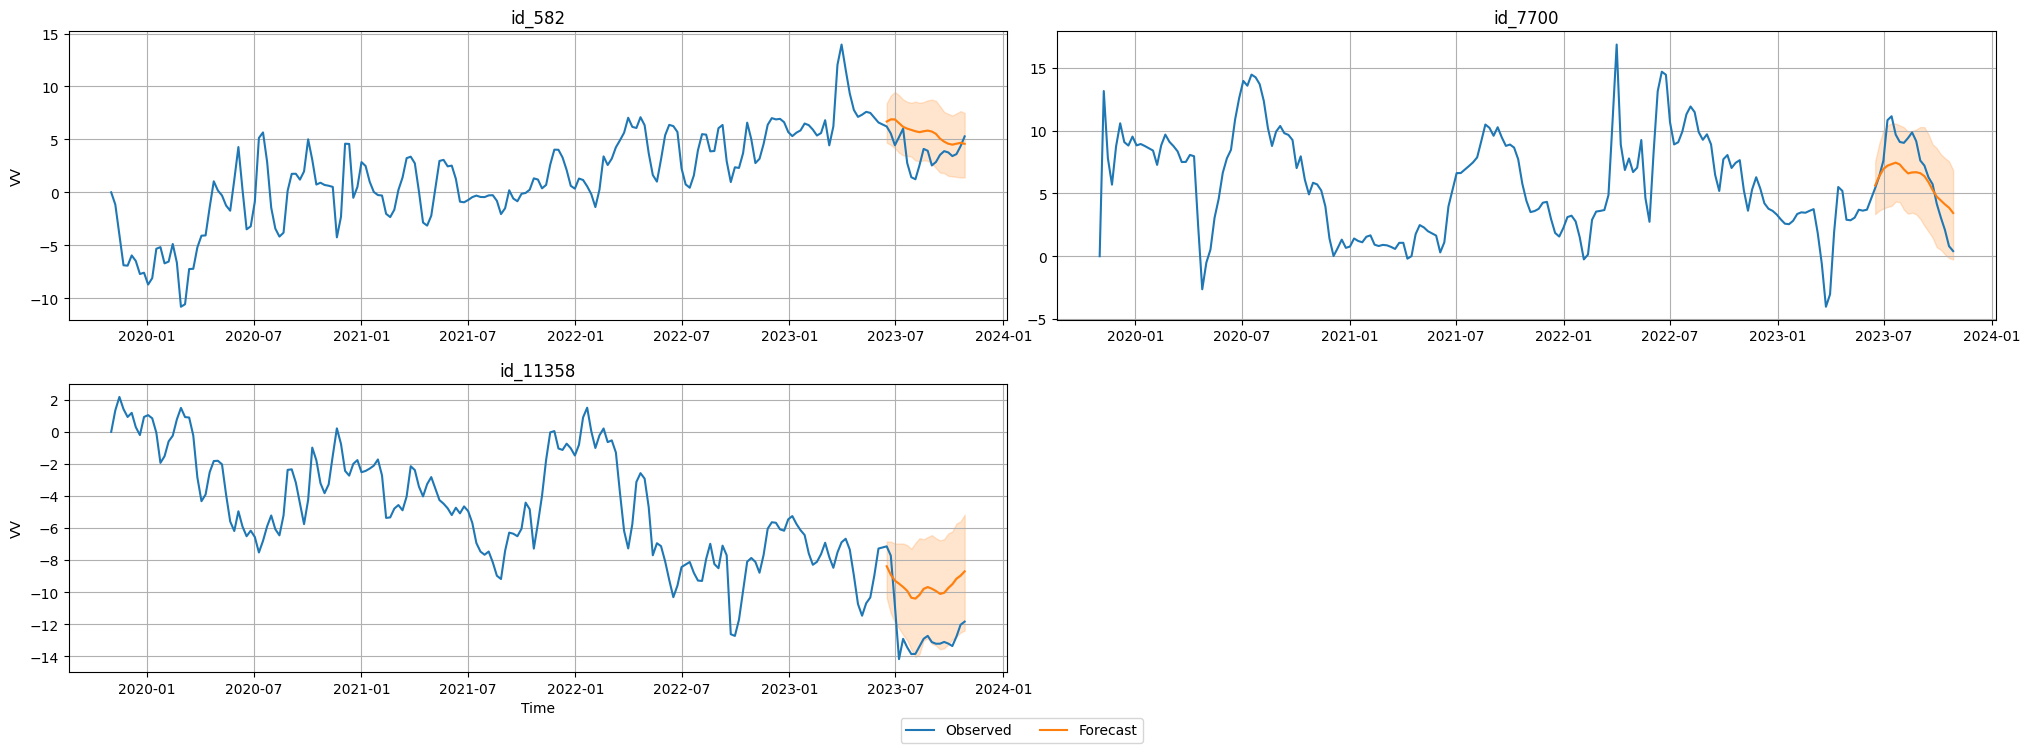

In [7]:
predictor.plot(
    data=data, 
    predictions=predictions, 
    quantile_levels=[0.1, 0.9],         
    max_history_length=210, 
    item_ids=["id_582", "id_7700", "id_11358"],     #use     max_num_item_ids=3      to randomly plot 3 item_ids  
)


In [8]:
predictor.leaderboard(test_data)

Generating leaderboard for all models trained
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loaded cached predictions for models ['TemporalFusionTransformer', 'PatchTST', 'WeightedEnsemble']
Prediction order: ['DirectTabular', 'AutoETS', 'PatchTST', 'DynamicOptimizedTheta', 'SeasonalNaive', 'CrostonSBA', 'TemporalFusionTransformer', 'DeepAR', 'NPTS', 'RecursiveTabular', 'WeightedEnsemble']
Shortening all series to at most 3374
Shortening all series to at most 3354
Predicting with model DirectTabular\W1
Predicting with model DirectTabular
Shortening all time series to at most 2500
Predicting with model AutoETS\W1
Predicting with model AutoETS
Shortening all time series to at most 2500
Predicting with model DynamicOptimizedTheta\W1
Predicting with model DynamicOptimizedTheta
Shortening all time series to at most 2500
Predicting with model SeasonalNaive\W1
Predicting with model SeasonalNaive
Shortening al

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-1.948925,-2.171072,0.933592,0.820338,2.246573,11
1,TemporalFusionTransformer,-2.087106,-2.238214,0.521468,0.424207,697.553120,8
2,PatchTST,-2.087954,-2.277878,0.410707,0.396131,138.360373,10
3,DeepAR,-2.366897,-2.617835,3.713054,3.573664,194.186858,9
4,RecursiveTabular,-2.765899,-2.869309,1.377661,1.466934,113.867430,2
5,DynamicOptimizedTheta,-2.879881,-3.620946,20.450550,1.000923,31.341640,6
6,DirectTabular,-2.925006,-2.987814,0.525760,0.479145,8.522927,3
7,SeasonalNaive,-2.994587,-3.621591,0.344648,0.250656,2.748057,1
8,AutoETS,-3.026028,-3.652864,41.388226,0.708641,19.576572,7
9,NPTS,-4.245208,-4.342670,3.872408,3.626306,3.474663,5
